In [167]:
from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### M1: Linear regression
### M2: MLP
### M3: GBR
### M4: RFR
### M5: Arima 
### M6: LSTM

In [123]:
# Load in Y_hat for models 1 to 6
# Y_hat 1:6
y_hat_Arima_21_March = pd.read_csv('../Results/y_hat_Arima_21_March.csv', index_col = 0)
y_hat_Arima_21_March.rename(columns = {'0':'Arima'},inplace = True)
y_hat_LSTM_21_March = pd.read_csv('../Results/y_hat_LSTM_21_March.csv', index_col = 0)
y_hat_LSTM_21_March.rename(columns = {'price':'LSTM'},inplace = True)
y_hat_4models_21_March = pd.read_csv('../Results/y_hat_4models_21_March.csv', index_col = 0)

In [124]:
Y_hat = pd.concat([y_hat_Arima_21_March, y_hat_4models_21_March, y_hat_LSTM_21_March], axis = 1)

In [153]:
Y_hat

,Arima,LR,RF,GB,MLP,LSTM
0,881.803619,884.189984,865.754179,876.330558,873.334995,887.733322
1,881.697031,889.658736,908.422786,884.167440,871.709920,906.471520
2,881.073762,883.650667,907.940893,878.093572,870.058952,909.829823
3,880.935118,885.114997,908.422786,883.923560,873.486743,908.881392
4,880.705053,879.573415,907.940893,877.711355,869.355222,915.793385
5,880.576559,874.734881,906.499301,876.459042,867.881190,925.174614
6,880.404926,884.970453,908.422786,879.874774,876.570062,930.373800
7,880.249339,882.751330,908.422786,877.305188,876.257338,933.600845
8,880.080462,882.799639,908.422786,877.118493,874.607969,931.682463
9,879.915833,876.298927,895.854495,874.790620,874.498789,931.085478


In [125]:
Y_hat1 = Y_hat.iloc[:,0]
Y_hat2 = Y_hat.iloc[:,1]
Y_hat3 = Y_hat.iloc[:,2]
Y_hat4 = Y_hat.iloc[:,3]
Y_hat5 = Y_hat.iloc[:,4]
Y_hat6 = Y_hat.iloc[:,5]

Y_hat1  = np.array(Y_hat1).reshape((len(Y_hat1), 1))
Y_hat2  = np.array(Y_hat2).reshape((len(Y_hat2), 1))
Y_hat3  = np.array(Y_hat3).reshape((len(Y_hat3), 1))
Y_hat4  = np.array(Y_hat4).reshape((len(Y_hat4), 1))
Y_hat5  = np.array(Y_hat5).reshape((len(Y_hat5), 1))
Y_hat6  = np.array(Y_hat6).reshape((len(Y_hat6), 1))

In [213]:
# Load in Y_true 
# Y_true
wavelet = pd.read_csv('../Data/wavelet_March.csv', )
wavelet.drop('Unnamed: 0', axis=1, inplace=True)
Y_true = wavelet
wavelet_rev = 30
Y_true = Y_true.iloc[492:,:]
Y_true.rename(columns = {'0':'Y_true '},inplace = True)
Y_true = Y_true.reset_index().drop(['index'], axis=1)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
# n = 6 # number of models
# for i in range(1, n+1):
#     name = 'LR%i' %i
#     exec(name + " = 'LinearRegression().fit(Y_true, Y_hat%i)' %i") 
#     name2 = 'pred%i' %i
#     exec(name2 + " = 'LiearRegression().predict(Y_hat%i)' %i")
#     name3 = 'rmse%i' %i
#     exec(name3 + " = 'mean_squared_error(Y_hat%i, pred%i)' %i")  

In [127]:
# Linear regression to represent difference between Y_hat and Y
LR1 = LinearRegression().fit(Y_true, Y_hat1)
LR2 = LinearRegression().fit(Y_true, Y_hat2)
LR3 = LinearRegression().fit(Y_true, Y_hat3)
LR4 = LinearRegression().fit(Y_true, Y_hat4)
LR5 = LinearRegression().fit(Y_true, Y_hat5)
LR6 = LinearRegression().fit(Y_true, Y_hat6)

In [128]:
pred1 = LR1.predict(Y_hat1)
pred2 = LR2.predict(Y_hat2)
pred3 = LR3.predict(Y_hat3)
pred4 = LR4.predict(Y_hat4)
pred5 = LR5.predict(Y_hat5)
pred6 = LR6.predict(Y_hat6)

In [129]:
rmse1 = mean_squared_error(Y_hat1, pred1)
rmse2 = mean_squared_error(Y_hat2, pred2)
rmse3 = mean_squared_error(Y_hat3, pred3)
rmse4 = mean_squared_error(Y_hat4, pred4)
rmse5 = mean_squared_error(Y_hat5, pred5)
rmse6 = mean_squared_error(Y_hat6, pred6)

In [149]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [275]:
x = [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6]
weights = softmax(x)

In [268]:
# Load in Y_hat(70days) for models 1 to 6
y_hat_Arima_70_March = pd.read_csv('../Results/Results_70/y_hat_Arima_70_March.csv', index_col = 0)
y_hat_Arima_70_March.rename(columns = {'0':'Arima'},inplace = True)
y_hat_LSTM_70_March = pd.read_csv('../Results/Results_70/y_hat_LSTM_70_March.csv', index_col = 0)
y_hat_LSTM_70_March.rename(columns = {'price':'LSTM'},inplace = True)
y_hat_LR_70_March = pd.read_csv('../Results/Results_70/y_hat_LR_70_March.csv', header = None, index_col = 0)
y_hat_RF_70_March = pd.read_csv('../Results/Results_70/y_hat_RF_70_March.csv', header = None, index_col = 0)
y_hat_GB_70_March = pd.read_csv('../Results/Results_70/y_hat_GB_70_March.csv', header = None, index_col = 0)
y_hat_MLP_70_March = pd.read_csv('../Results/Results_70/y_hat_MLP_70_March.csv', header = None, index_col = 0)

In [269]:
Y_hat = pd.concat([y_hat_Arima_70_March, y_hat_LR_70_March, y_hat_RF_70_March, y_hat_GB_70_March, y_hat_MLP_70_March, y_hat_LSTM_70_March], axis = 1)

In [270]:
Y_hat

,Arima,1,1,1,1,LSTM
0,861.031373,890.823993,915.751909,899.876615,879.509898,931.041039
1,860.743269,895.825987,915.751909,900.265386,880.517054,931.143292
2,860.517030,899.374697,915.751909,900.966323,885.590468,931.568555
3,860.304591,902.498290,915.751909,900.271702,889.846573,931.749749
4,860.108876,905.559905,915.751909,900.271702,895.479523,931.406297
5,859.911698,907.207363,915.751909,901.682558,899.627156,932.600125
6,859.713838,907.923209,915.751909,899.996430,900.561117,931.859505
7,859.514551,907.550838,915.751909,903.347964,903.498495,929.483076
8,859.315117,912.094440,915.751909,903.519955,903.919919,931.116025
9,859.115659,915.311293,915.751909,903.910419,907.069104,935.466555


In [271]:
Y_hat1 = Y_hat.iloc[:,0]
Y_hat2 = Y_hat.iloc[:,1]
Y_hat3 = Y_hat.iloc[:,2]
Y_hat4 = Y_hat.iloc[:,3]
Y_hat5 = Y_hat.iloc[:,4]
Y_hat6 = Y_hat.iloc[:,5]

In [272]:
Y_hat_final =  Y_hat1*weights[0] + Y_hat2*weights[1] + Y_hat3*weights[2] + \
Y_hat4*weights[3] + Y_hat5*weights[4] + Y_hat6*weights[5] + wavelet_rev

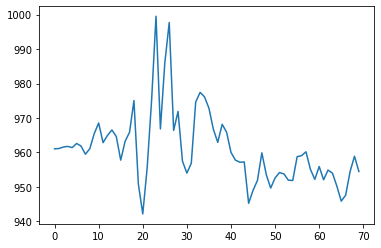

In [273]:
plt.plot(Y_hat_final)

In [274]:
print(Y_hat_final)

0     961.041039
1     961.143292
2     961.568555
3     961.749749
4     961.406297
5     962.600125
6     961.859505
7     959.483076
8     961.116025
9     965.466555
10    968.551079
11    962.841637
12    964.935760
13    966.519831
14    964.622738
15    957.768799
16    963.227755
17    965.852227
18    975.054169
19    950.841068
20    942.149596
21    955.545334
22    975.083789
23    999.539249
24    966.829681
25    985.981492
26    997.718601
27    966.398866
28    971.911199
29    957.484300
         ...    
40    960.010174
41    957.770411
42    957.163704
43    957.241202
44    945.239511
45    948.983967
46    951.878448
47    959.884779
48    953.565726
49    949.660589
50    952.602307
51    954.156527
52    953.757649
53    951.944183
54    951.851697
55    958.768797
56    959.068862
57    960.187420
58    955.129605
59    952.183949
60    955.910075
61    952.057423
62    954.881116
63    953.977765
64    950.234753
65    945.868130
66    947.603223
67    954.4507

In [267]:
# pd.DataFrame(Y_hat_final).to_csv('../Results/Y_hat_final_March.csv')